### 1.load the file name "song.npy" and write a function as below

import Audio from Ipython

define a function which convert notes to frequencies:

forumla: $$ 2**(notes-69)/12*440$$
def a function which convert frequencies to sample:

- function take arg as the frequencies, tempo , sample_rate
 - create a variable  note duration which is 60/tempo
 - frequency=(note duration* frequencies )/note_duration
 - n_sample=note duration* sample_rate
 - time=evenly spaces time from 0 to note_duration spaced by n_samples
 - wave = sine(2*pi*frequencies*time)
 - keep all the notes with frequencies>9
 return the wave 
def a function which convert chords to sample

take an arg chords, tempo , sample_rate
freq= function which convert note to freq for chord
return the mean from the function which convert freq to samples where frequencies for the function is the each transpose value in freq
define function to play the song which take chords, tempo, amplitude, sample_rate as an argument

sample =amplitude* function to convert chords to sample
return display(Audio(sample, rate=sample_rate))

In [25]:
import numpy as np
from IPython.display import Audio


data = np.load("song.npy")


def convert_notes_to_frequencies(notes):
    return 2**((notes-69)/12)*440


def frequencies_to_sample(frequencies, tempo, sample_rate):
    note_duration = 60/tempo
    frequencies = (note_duration*frequencies)/note_duration
    n_sample = int(note_duration*sample_rate)
    time = np.linspace(0, note_duration, n_sample)
    wave = np.sin(
        2*np.pi*frequencies.reshape(-1, 1)*time)
    wave*=(frequencies>9).reshape(-1,1)
    return wave.reshape(-1)


def chords_to_sample(chords, tempo, sample_rate):
    frequency = convert_notes_to_frequencies(chords)
    return (np.mean([frequencies_to_sample(f, tempo, sample_rate) for f in frequency.T],0))


def to_play_song(chords, tempo, amplitude, sample_rate):
    sample=amplitude*chords_to_sample(chords, tempo, sample_rate)
    print(sample)
    return display(Audio(sample, rate=sample_rate))


# tempo=160, amplitude=0.1, sample_rate=44100
to_play_song(data, 160, 0.1, 44100)

[ 0.     0.006  0.012 ... -0.04  -0.038 -0.036]


### 2.load the file name pic.npy
write a function which take an array

import matplotlib.pyplot as plt

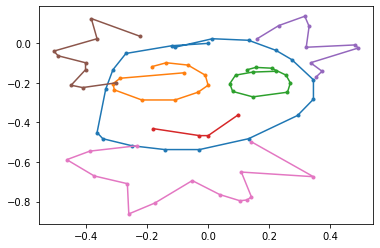

In [19]:
import numpy as np
import matplotlib.pyplot as plt

pic = np.load("pic.npy")

# create a variable origin which a zero array of shape (1,3)
origin = np.zeros((1, 3))

# create a variable sketch which stack row_wise the origin and the array
sketch = np.vstack((origin, pic))

# create a variable stroke and get the argument where the last column of the sketch is 1.
stroke = np.where(pic[:, 2] == 1)[0]

coordinates = np.cumsum(sketch[:, 0:2], axis=0)
split = np.split(coordinates, stroke+2)
plt.plot(coordinates[:, 0], -coordinates[:, 1], "w:")
for i in split:
    plt.plot(i[:, 0], -i[:, 1],".-")